
# Project: Seun Olukanmi_NoShowAppointment 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This section presents the introduction of the project. First, the dataset is described briefly and then the questions to be explored over the course of the project are highlighted.

## Introduction of the Dataset
> For my project, I have selected the No_Show dataset which contains information about 100k medical appointments in Brazil.
The dataset is focused on the question whether or not patients show up for their apppintments. Each row contains a number of features for each patient. Some of them are ‘ScheduledDay’, which depicts the day the patient set up their appointment, ‘Neighborhood’, which indicates the location of the hospital, and ‘Scholarship’, which indicates whether or not the patient is
enrolled in Brasilian welfare program Bolsa Família. 

## Questions to be Explored
> Question 1: Is there any relationship between age and showing up or missing appointments?\
  Question 2: Is there any relationship between gender and showing up or missing appointments?\
  Question 3: Is there any relationship between patient being on scholarship and showing up or missing appointments?\
  Question 4: How does the long-term disease that patients have affect their keeping of their appointments?\
  Question 5: Does receiving an SMS play any role in patient's showing up or missing appointment? 

In [1]:
# The packages that would be used in the course of the project are imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data was loaded and checked for cleanliness. The steps followed for cleaning are carefully documented in the following cells. 

In [2]:
# Here the data is loaded, the number of rows and columns printed, and the first 10 rows printed. 
df = pd.read_csv('noshowappointments.csv')
print(df.shape)
df.head(10)

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#   types and look for instances of missing or possibly errant data.
# checking the data types of the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Here, I check the number of unique values in each column of the dataframe
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
# Here, I'm checking for any duplicate rows in the dataframe
df.duplicated().sum()

0

In [6]:
# This shows basic descriptive statistics for each column of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The cells above contains code that helps to understand the structure of the data and look for missing data instances, duplicate rows, or errant data. These steps are necessary in order to go ahead with the data cleaning stage. 

### Data Cleaning
>Looking at the dataset, it has 110527 rows and 14 columns. There are no duplicate rows and no missing data. However, some cleaning still has to be done.
> Some columnns have to be renamed due to typographical errors.
> The ScheduledDay and AppointmentDay columns need to be converted to a date-time type. The PatientID column also needs conversion to integer data type
> Also, the descriptive statistics of the age column shows the minimum age to be -1, so those rows have to be dropped since no one's age can be negative.
Each cleaning step is done in the cells below.

In [7]:
# Here,the datatype of the PatientID column was changed to integer
df['PatientId'] = df['PatientId'].astype(np.int64)
#Confirming that the patientID column has changed to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Here, the ScheduledDay and AppointmentDay columns are converted to date-time format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format ='%Y-%m-%d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format ='%Y-%m-%d')
#confirming that the two columns have been changed to date-time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# This replaces the yes/no with 1/0 in the No-show column to aid data analysis
df = df.replace({'No-show': {'Yes': 1, 'No': 0}})

In [12]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0


In [13]:
# Getting the index of the rows that have a negative (-1) age 
df.index[df['Age']== -1].tolist()

[99832]

In [14]:
# dropping the row with the negative age using the index
df.drop(df.index[99832], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [15]:
#Changing the column labels to correct typographical errors and for uniformity
df.rename(columns={'Hipertension':'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)

In [16]:
#checking to see if the column names have been changed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### First, let's consider the number of patients that showed up versus those that miss their appointments 

0 = showedUp and 1 = Missed: 

0    88207
1    22319
Name: No_show, dtype: int64
22319 patients from a total sample of 110526 patients missed their appointments


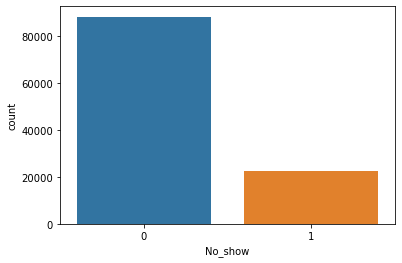

In [17]:
def Missed_class():

    Missed = 0
    for value in df['No_show']:
        if value == 1:
            Missed += 1
    print (Missed, "patients from a total sample of", len(df['No_show']), "patients missed their appointments")
print ("0 = showedUp and 1 = Missed: \n")
print (df['No_show'].value_counts())
sns.countplot(x='No_show', data=df)

Missed_class()

#### The cell above reveal that majority of the patients (around 80%) showed up for their appointments while a smaller proportion (just slightly above 20%) missed their appointments.

### Question 1: Is there any relationship between age and showing up or missing appointments?

### First, I split the dataframe in to two: one with the data of the patients that showed up and the other with patients that missed their appointments

In [18]:
df_showedUp = df[df['No_show']== 0]
df_showedUp.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,8.820700e+04,8.820700e+04,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.0
mean,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,0.0
std,2.563739e+14,6.931193e+04,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,0.0
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.176138e+13,5.685683e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.433684e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0


### From the count above, there are 88207 patients that showed up for their appointments

In [19]:
df_Missed = df[df['No_show']== 1]
df_Missed.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


### There are 22319 patients that missed their appointments

### below are histogram and box plots showing the age distribution of all the patients

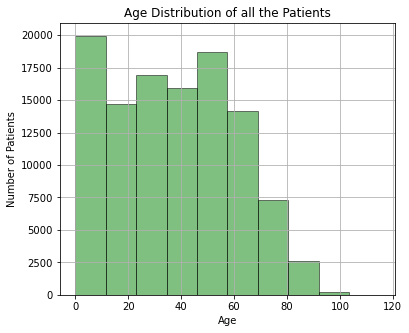

In [20]:
#below is a histogram plot showing the age distribution of all the patients
df['Age'].hist(figsize=(6,5), color='green', alpha=0.5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of all the Patients');

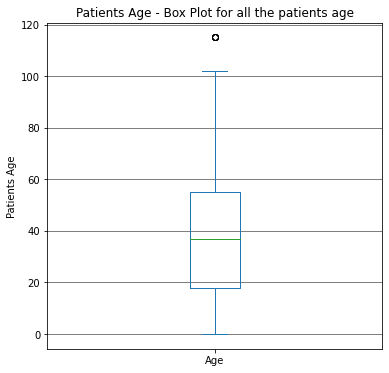

In [21]:
# let's also see a box plot visualization for all the patients' age distribution
df['Age'].plot(kind='box', figsize=(6,6))
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.ylabel('Patients Age')
plt.title('Patients Age - Box Plot for all the patients age');

### Below is the histogram plot of patients that showed up for their appointment

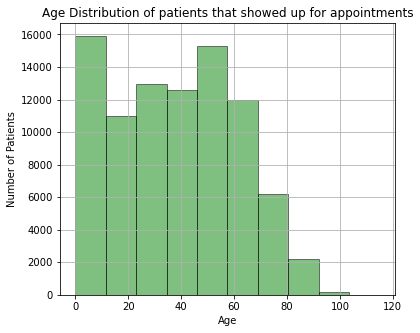

In [22]:
#histogram plot of patients that showed up for their appointment
df_showedUp['Age'].hist(color = 'green', figsize=(6,5), alpha=0.5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of patients that showed up for appointments');

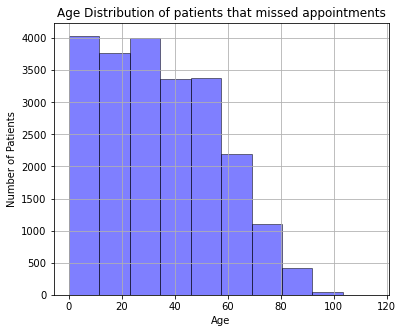

In [23]:
#histogram plot of patients that missed their appointments
df_Missed['Age'].hist(color = 'blue', figsize=(6,5), alpha=0.5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of patients that missed appointments');

#### Insights from visualizations:
> (1)The histogram for age distribution of the total sample of patients shows that there are more younger people among all the patients and infact, the largest age group are children. It is also evident that senior citizens are the smallest age group size among the patients.\
  (2)The box plot shows the median age is less than 40 and most of the patients are middle aged.\
  (3)The histogram for age distribution of patients that showed up for their appointments is more like the histogram of age distribution of the total sample.\
  (4) The histogram for age didtribution of patients that missed their appointments shows that younger people missed their appointment more than the older patients.

## Question 2: Is there any relationship between gender and showing up or missing appointments?

In [24]:
genderNo = df['Gender'].value_counts()
genderNo

F    71839
M    38687
Name: Gender, dtype: int64

In [25]:
genderProportion = df['Gender'].value_counts(normalize=True)
genderProportion

F    0.649974
M    0.350026
Name: Gender, dtype: float64

### From the count, females are about 65% of the patient population (71839) while males are around 35% (38687)

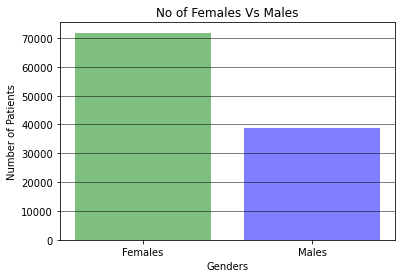

In [26]:
#Let's visualize the number of females and males using a bar chart
Females = sum(df['Gender'] == 'F')
Males = sum(df['Gender'] == 'M')
colors = ['green', 'blue']
locations = [1,2]
heights = [Females, Males]
labels = ['Females','Males']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('No of Females Vs Males')
plt.ylabel('Number of Patients');
plt.xlabel('Genders');

In [27]:
# categorising the number of patients that showed up Vs patients that missed appointments by gender
ns2=df['No_show'].groupby(df['Gender']).value_counts().tolist()
ns2

[57245, 14594, 30962, 7725]

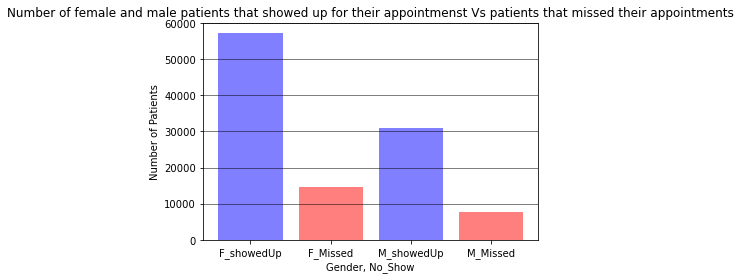

In [28]:
# Here, I want to visualize number of females that showed up Vs females that didn't show up, 
#as well as males that showed up Vs males that didn't turn up for their appointments

F_showedUp = ns2[0]
F_Missed = ns2[1]
M_showedUp = ns2[2]
M_Missed = ns2[3]
colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [F_showedUp, F_Missed, M_showedUp, M_Missed]
labels = ['F_showedUp', 'F_Missed','M_showedUp', 'M_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Number of female and male patients that showed up for their appointmenst Vs patients that missed their appointments')
plt.ylabel('Number of Patients');
plt.xlabel('Gender, No_Show');

### To make it clearer, below is a plot of the portion of females and males that showed up for their appointment Vs those that missed their appointment

In [29]:
ns3=df['No_show'].groupby(df['Gender']).value_counts(normalize=True).tolist()
ns3

[0.7968512924734475,
 0.20314870752655242,
 0.8003205211052808,
 0.19967947889471915]

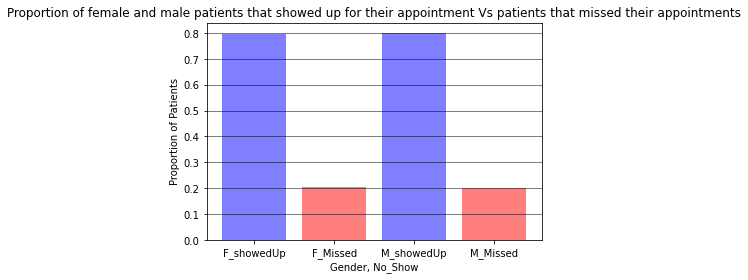

In [30]:
# Here, I'm showing proportion of females that showed up Vs females that didn't show up, 
#as well as proportion of males that showed up Vs males that didn't turn up for their appointments

F_showedUp = ns3[0]
F_Missed = ns3[1]
M_showedUp = ns3[2]
M_Missed = ns3[3]
colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [F_showedUp, F_Missed, M_showedUp, M_Missed]
labels = ['F_showedUp', 'F_Missed','M_showedUp', 'M_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of female and male patients that showed up for their appointment Vs patients that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Gender, No_Show');

### After the total number of patients have been divided into those that showed up and those that did not show up, Below is a pie chat plot of the portion of females and males that showed up for their appointment 

In [31]:
df_showedUp['Gender'].value_counts(normalize=True)


F    0.648985
M    0.351015
Name: Gender, dtype: float64

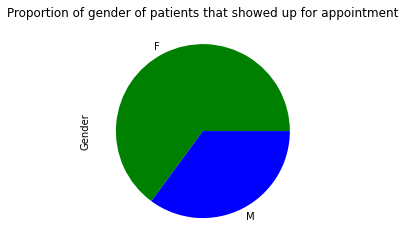

In [32]:
colors = ['green', 'blue']
df_showedUp['Gender'].value_counts().plot.pie(colors=colors)
plt.title('Proportion of gender of patients that showed up for appointment');

### Below is a pie chat plot of the portion of females and males that missed their appointment 

In [33]:
df_Missed['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

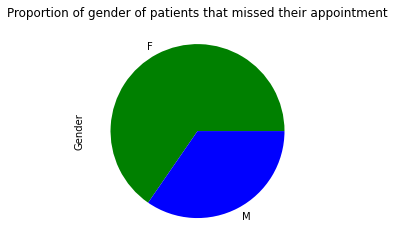

In [34]:
colors = ['green', 'blue']
df_Missed['Gender'].value_counts().plot.pie(colors=colors)
plt.title('Proportion of gender of patients that missed their appointment');

### From the plots above, some insights can be derived:
>  (1) There are more female than male patients. By proportion, there are approx.65% total female patients versus  approx.35% total males\
   (2) The proportion of the female patients that showed up for their appointment is about the same as the proportion of the males that showed up (approx.80%). Similarly, the proportion of females and males that missed their appointments is about the same (approx.20%).\
   (3) When the total number of paients was divided into two (those who showed up Vs those who missed appointments), the gender distribution is almost the same (approx.65% females, approx.35%males) as the gender distribution for the entire sample.\
  
  ### >This suggests that showing up or missing appointments has got nothing to do with a patient's gender

## Question 3: Is there any relationship between patient being on scholarship and showing up or missing appointments?

In [35]:
 # counts of patients that received scholarship or not
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [36]:
# proportion of patients that received scholarship or not
df['Scholarship'].value_counts(normalize=True)

0    0.901734
1    0.098266
Name: Scholarship, dtype: float64

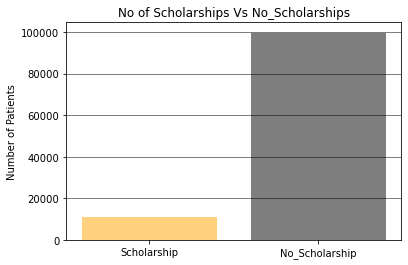

In [37]:
#Let's visualize the number of patients that received scholarship Vs. those that did not receive using a bar chart
scholarship = sum(df['Scholarship'] == 1)
no_scholarship = sum(df['Scholarship'] == 0)
colors = ['orange', 'black']
locations = [1,2]
heights = [scholarship, no_scholarship]
labels = ['Scholarship','No_Scholarship']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('No of Scholarships Vs No_Scholarships')
plt.ylabel('Number of Patients');

### From the above counts and plot, most of the patients are not enrolled on the welfare program, only about 9.8% were scholarship recipients

In [38]:
# categorising the number of patients that showed up Vs patients that missed appointments by scholarship
ns4=df['No_show'].groupby(df['Scholarship']).value_counts().tolist()
ns4

[79924, 19741, 8283, 2578]

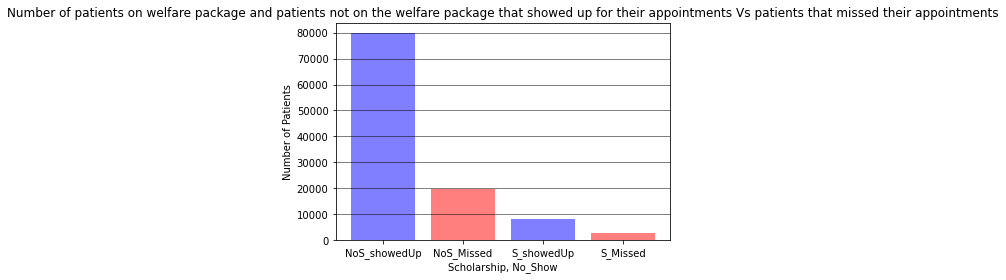

In [39]:
# Here, I want to visualize number of scholarship recipients that showed up Vs scholarship recipients that didn't show up, 
#as well as non scholarship recipients that showed up Vs non scholarship recipients that didn't turn up for their appointments

NoS_showedUp = ns4[0]
NoS_Missed = ns4[1]
S_showedUp = ns4[2]
S_Missed = ns4[3]
colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [NoS_showedUp, NoS_Missed, S_showedUp, S_Missed]
labels = ['NoS_showedUp', 'NoS_Missed','S_showedUp', 'S_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Number of patients on welfare package and patients not on the welfare package that showed up for their appointments Vs patients that missed their appointments')
plt.ylabel('Number of Patients');
plt.xlabel('Scholarship, No_Show');

### To make it clearer, below is a plot of the portion of scholarship recipients and non-scholarship recipients that showed up for their appointment Vs those that missed their appointment

In [40]:
ns5=df['No_show'].groupby(df['Scholarship']).value_counts(normalize=True).tolist()
ns5

[0.8019264536196258,
 0.19807354638037425,
 0.7626369579228433,
 0.2373630420771568]

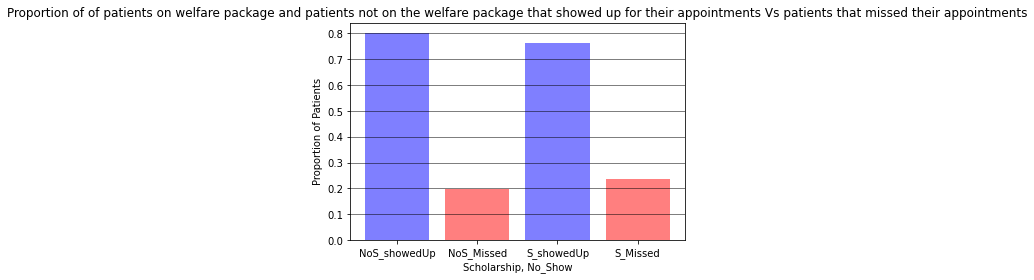

In [41]:
# Here, I'm showing proportion of scholarship recipients that showed up Vs scholarship recipients that didn't show up, 
#as well as non-scholarship recipients that showed up Vs non-scholarship recipients that didn't show up for their appointments

NoS_showedUp = ns5[0]
NoS_Missed = ns5[1]
S_showedUp = ns5[2]
S_Missed = ns5[3]

colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [NoS_showedUp, NoS_Missed, S_showedUp, S_Missed]
labels = ['NoS_showedUp', 'NoS_Missed','S_showedUp', 'S_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of of patients on welfare package and patients not on the welfare package that showed up for their appointments Vs patients that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Scholarship, No_Show');

### After the total number of patients have been divided into those that showed up and those that did not show up, Below is a pie chat plot of the portion of scholarship recipients and non-scholarship recipients that showed up for their appointment 

In [42]:
df_showedUp['Scholarship'].value_counts(normalize=True)

0    0.906096
1    0.093904
Name: Scholarship, dtype: float64

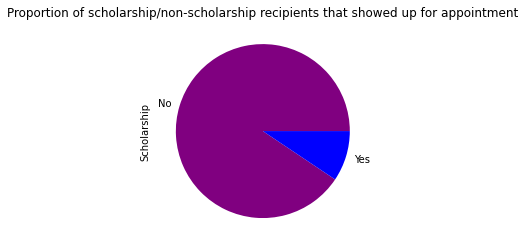

In [43]:
colors = ['purple', 'blue']
labels = ['No','Yes']
df_showedUp['Scholarship'].value_counts().plot.pie(colors=colors, labels=labels)
plt.title('Proportion of scholarship/non-scholarship recipients that showed up for appointment');

In [44]:
df_Missed['Scholarship'].value_counts(normalize=True)

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

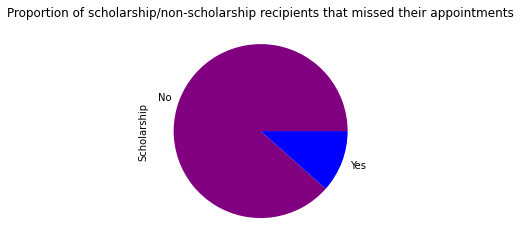

In [45]:
colors = ['purple', 'blue']
labels = ['No','Yes']
df_Missed['Scholarship'].value_counts().plot.pie(colors=colors, labels = labels)
plt.title('Proportion of scholarship/non-scholarship recipients that missed their appointments');

### From the visualizations above, some insights can be derived:
>  (1) From the total sample of patients, most of them are not enrolled on the welfare program, only about 9.8% are scholarship recipients\
   (2) A slightly higher proportion of the scholarship recipient group missed their appointments compared to the group of patients without scholarship.

## Question 4: How does the long-term disease that patients have affect their keeping of their appointments?

#### Let's consider hypertension first

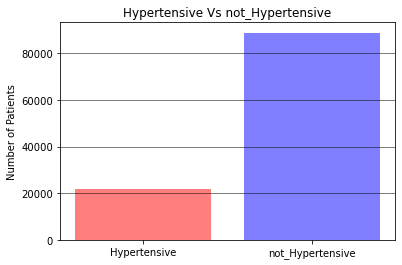

In [46]:
#Let's visualize the number of total patients who have hypertension versus patients who don't using a bar chart
Hypertensive = sum(df['Hypertension'] == 1)
not_Hypertensive = sum(df['Hypertension'] == 0)
colors = ['red', 'blue']
locations = [1,2]
Hypertensive_heights = [Hypertensive, not_Hypertensive]
labels = ['Hypertensive', 'not_Hypertensive']
plt.bar(locations, Hypertensive_heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Hypertensive Vs not_Hypertensive')
plt.ylabel('Number of Patients');

In [47]:
df['Hypertension'].value_counts(normalize=True)

0    0.802752
1    0.197248
Name: Hypertension, dtype: float64

In [48]:
ns6=df['No_show'].groupby(df['Hypertension']).value_counts(normalize=True).tolist()
ns6

[0.7909608340377571,
 0.2090391659622429,
 0.8269804137424889,
 0.17301958625751113]

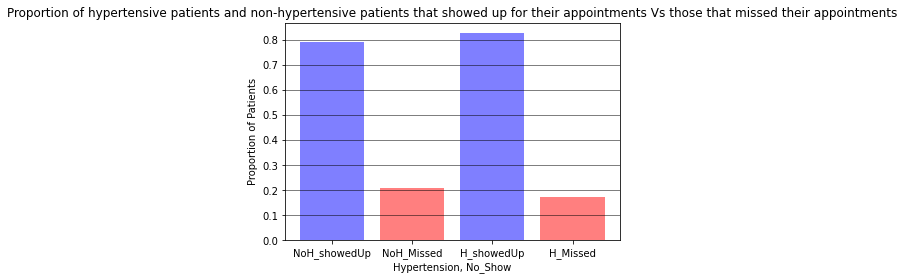

In [49]:
# Here, I'm showing proportion of hypertensive patients and non-hypertensive patients that showed up for their appointments Vs those that missed their appointments 


NoH_showedUp = ns6[0]
NoH_Missed = ns6[1]
H_showedUp = ns6[2]
H_Missed = ns6[3]

colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [NoH_showedUp, NoH_Missed, H_showedUp, H_Missed]
labels = ['NoH_showedUp', 'NoH_Missed','H_showedUp', 'H_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of hypertensive patients and non-hypertensive patients that showed up for their appointments Vs those that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Hypertension, No_Show');

##### Looking closely at the group of patients that showed up for their appointment below

In [50]:
df_showedUp['Hypertension'].value_counts(normalize=True)

0    0.795606
1    0.204394
Name: Hypertension, dtype: float64

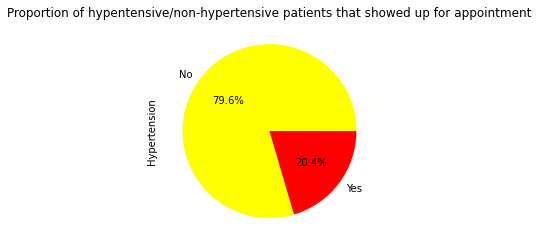

In [51]:
colors = ['yellow', 'red']
labels = ['No','Yes']
df_showedUp['Hypertension'].value_counts().plot.pie(colors=colors, labels=labels, autopct='%.1f%%')
plt.title('Proportion of hypentensive/non-hypertensive patients that showed up for appointment');

##### Looking closely at the group that missed their appointment below

In [52]:
df_Missed['Hypertension'].value_counts(normalize=True)

0    0.830996
1    0.169004
Name: Hypertension, dtype: float64

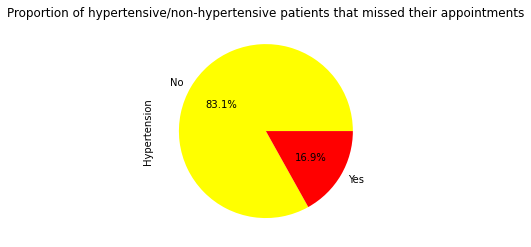

In [53]:
colors = ['yellow', 'red']
labels = ['No','Yes']
df_Missed['Hypertension'].value_counts().plot.pie(colors=colors, labels = labels, autopct='%.1f%%')
plt.title('Proportion of hypertensive/non-hypertensive patients that missed their appointments');

#### Insight I can draw from the visualizations:
>(1) The percentage of hypentensive patients from the total sample of patients is not large (19.7%).\
 (2)A larger percentage of hypertensive patients kept their appointments.

#### Now considering diabetic patients

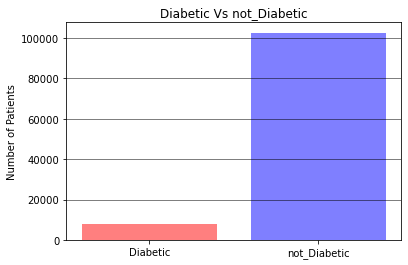

In [54]:
#Let's visualize the number of total patients who are diabetic versus patients who are not diabetic using a bar chart
Diabetic = sum(df['Diabetes'] == 1)
not_Diabetic = sum(df['Diabetes'] == 0)
colors = ['red', 'blue']
locations = [1,2]
Diabetic_heights = [Diabetic, not_Diabetic]
labels = ['Diabetic', 'not_Diabetic']
plt.bar(locations, Diabetic_heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Diabetic Vs not_Diabetic')
plt.ylabel('Number of Patients');

In [55]:
df['Diabetes'].value_counts(normalize=True)

0    0.928135
1    0.071865
Name: Diabetes, dtype: float64

In [56]:
ns7=df['No_show'].groupby(df['Diabetes']).value_counts(normalize=True).tolist()
ns7

[0.7963697688700857,
 0.20363023112991432,
 0.8199672667757774,
 0.18003273322422259]

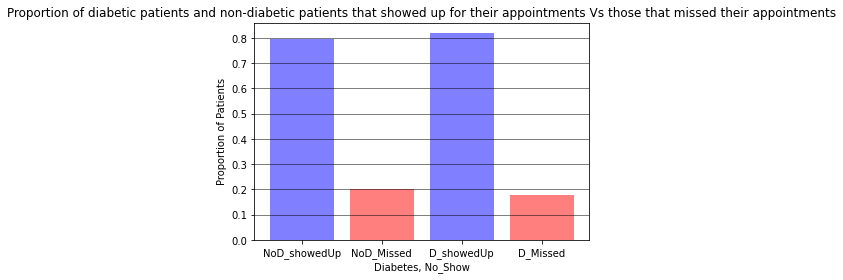

In [57]:
# Here, I'm showing proportion of diabetic/non-diabetic patients that showed up Vs those that didn't show up

NoD_showedUp = ns7[0]
NoD_Missed = ns7[1]
D_showedUp = ns7[2]
D_Missed = ns7[3]

colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [NoD_showedUp, NoD_Missed, D_showedUp, D_Missed]
labels = ['NoD_showedUp', 'NoD_Missed','D_showedUp', 'D_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of diabetic patients and non-diabetic patients that showed up for their appointments Vs those that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Diabetes, No_Show');

##### Looking closely at the group of patients that showed up for their appointment below

In [58]:
df_showedUp['Diabetes'].value_counts(normalize=True)

0    0.926162
1    0.073838
Name: Diabetes, dtype: float64

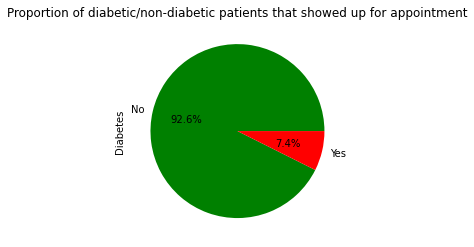

In [59]:
colors = ['green', 'red']
labels = ['No','Yes']
df_showedUp['Diabetes'].value_counts().plot.pie(colors=colors, labels=labels, autopct='%.1f%%')
plt.title('Proportion of diabetic/non-diabetic patients that showed up for appointment');

##### Looking closely at the group that missed their appointment below

In [60]:
df_Missed['Diabetes'].value_counts(normalize=True)

0    0.935929
1    0.064071
Name: Diabetes, dtype: float64

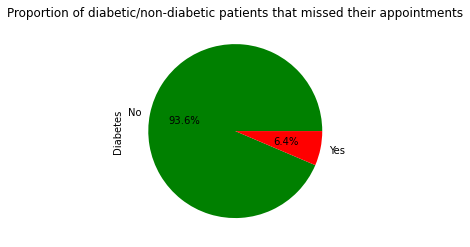

In [61]:
colors = ['green', 'red']
labels = ['No','Yes']
df_Missed['Diabetes'].value_counts().plot.pie(colors=colors, labels = labels, autopct='%.1f%%')
plt.title('Proportion of diabetic/non-diabetic patients that missed their appointments');

#### Insight I can draw from the visualizations:
>(1) The percentage of hypentensive patients from the total sample of patients is small (7.2%).\
 (2)Like the case for hypentensive patients, there was a higher proportion of diabetic patients that showed up for their appointments than diabetic patients who missed their appointments.

#### Now considering patients who have alcoholism

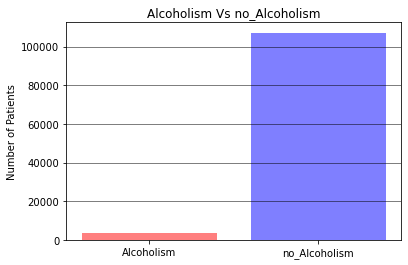

In [62]:
#Let's visualize the number of patients who have alcoholsim versus patients who are free from alcoholism using a bar chart
Alcoholism = sum(df['Alcoholism'] == 1)
no_Alcoholism = sum(df['Alcoholism'] == 0)
colors = ['red', 'blue']
locations = [1,2]
Alcoholism_heights = [Alcoholism, no_Alcoholism]
labels = ['Alcoholism', 'no_Alcoholism']
plt.bar(locations, Alcoholism_heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Alcoholism Vs no_Alcoholism')
plt.ylabel('Number of Patients');

In [63]:
df['Alcoholism'].value_counts(normalize=True)

0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64

In [64]:
ns8=df['No_show'].groupby(df['Alcoholism']).value_counts(normalize=True).tolist()
ns8

[0.7980516208498964,
 0.20194837915010358,
 0.7985119047619048,
 0.20148809523809524]

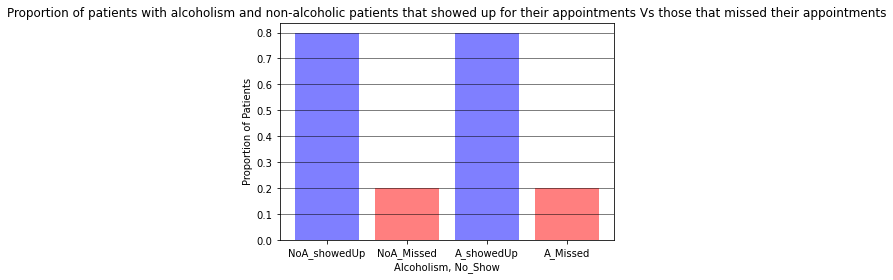

In [65]:
# Here, I'm showing proportion of patients with alcoholism and non-alcoholic patients that showed up for their appointments Vs those that missed their appointments 


NoA_showedUp = ns8[0]
NoA_Missed = ns8[1]
A_showedUp = ns8[2]
A_Missed = ns8[3]

colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [NoA_showedUp, NoA_Missed, A_showedUp, A_Missed]
labels = ['NoA_showedUp', 'NoA_Missed','A_showedUp', 'A_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of patients with alcoholism and non-alcoholic patients that showed up for their appointments Vs those that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Alcoholism, No_Show');

##### Looking closely at the group of patients that showed up for their appointment below

In [66]:
df_showedUp['Alcoholism'].value_counts(normalize=True)

0    0.969583
1    0.030417
Name: Alcoholism, dtype: float64

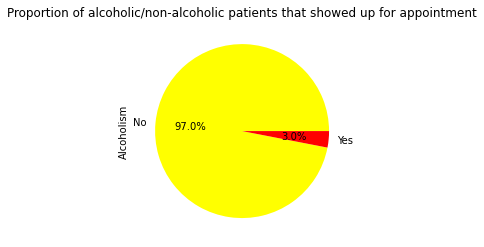

In [67]:
colors = ['yellow', 'red']
labels = ['No','Yes']
df_showedUp['Alcoholism'].value_counts().plot.pie(colors=colors, labels=labels, autopct='%.1f%%')
plt.title('Proportion of alcoholic/non-alcoholic patients that showed up for appointment');

##### Looking closely at the group that missed their appointment below

In [68]:
df_Missed['Alcoholism'].value_counts(normalize=True)

0    0.969667
1    0.030333
Name: Alcoholism, dtype: float64

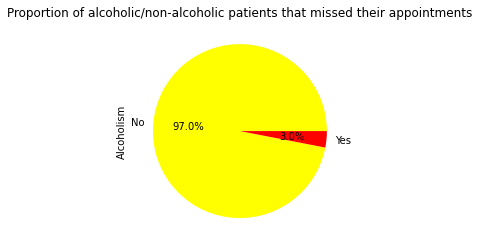

In [69]:
colors = ['yellow', 'red']
labels = ['No','Yes']
df_Missed['Alcoholism'].value_counts().plot.pie(colors=colors, labels = labels, autopct='%.1f%%')
plt.title('Proportion of alcoholic/non-alcoholic patients that missed their appointments');

#### Insight I can draw from the visualizations:
>(1) Only about 3% of the total sample of patients have alcoholism.\
 (2)Looking closely at the group of patients that showed up and the group that missed appointments, the distribution remains the same as in the total sample of patients.
 ###### > Alcoholism doesn't seem to have a relationship with showing up or missing appointment

#### Now considering Handicapped patients

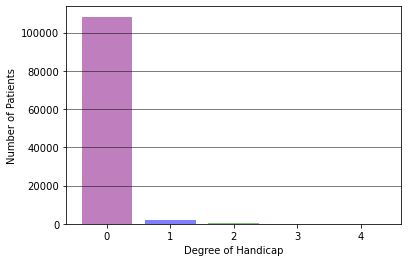

In [70]:
#Let's visualize the number of patients who are handicapped versus patients who are not handicapped using a bar chart
handicap_0 = sum(df['Handicap'] == 0)
handicap_1 = sum(df['Handicap'] == 1)
handicap_2 = sum(df['Handicap'] == 2)
handicap_3 = sum(df['Handicap'] == 3)
handicap_4 = sum(df['Handicap'] == 4)
colors = ['purple', 'blue','green','yellow','red']
locations = [1,2,3,4,5]
handicapped_heights = [handicap_0, handicap_1, handicap_2, handicap_3, handicap_4]
labels = ['0', '1', '2', '3', '4']
plt.bar(locations, handicapped_heights, color=colors, tick_label=labels, alpha=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.ylabel('Number of Patients');
plt.xlabel('Degree of Handicap');

In [71]:
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [72]:
df['Handicap'].value_counts(normalize=True)

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handicap, dtype: float64

In [73]:
ns9=df['No_show'].groupby(df['Handicap']).value_counts(normalize=True).tolist()


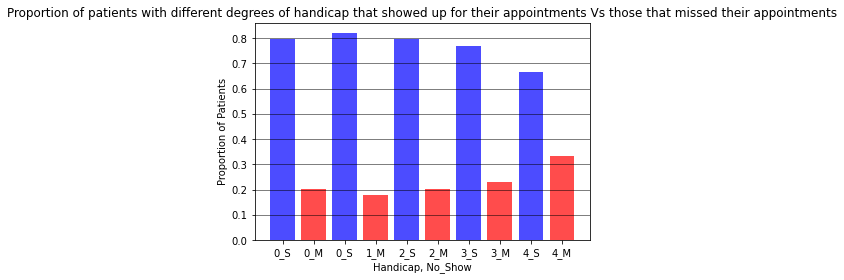

In [74]:
# Here, I'm showing proportion of patients with different degrees of disability that showed up for their appointments Vs those that missed their appointments 


deg0_showedUp = ns9[0]
deg0_Missed = ns9[1]
deg1_showedUp = ns9[2]
deg1_Missed = ns9[3]
deg2_showedUp = ns9[4]
deg2_Missed = ns9[5]
deg3_showedUp = ns9[6]
deg3_Missed = ns9[7]
deg4_showedUp = ns9[8]
deg4_Missed = ns9[9]

colors = ['blue','red','blue','red', 'blue','red','blue','red', 'blue','red']
locations = [1,2,3,4,5,6,7,8,9,10]
heights = [deg0_showedUp, deg0_Missed, deg1_showedUp, deg1_Missed, deg2_showedUp, deg2_Missed, deg3_showedUp, deg3_Missed, deg4_showedUp, deg4_Missed]
labels = ['0_S', '0_M','0_S', '1_M','2_S', '2_M','3_S', '3_M', '4_S', '4_M']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7,)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Proportion of patients with different degrees of handicap that showed up for their appointments Vs those that missed their appointments')
plt.ylabel('Proportion of Patients');
plt.xlabel('Handicap, No_Show');

In [75]:
ns10=df['No_show'].groupby(df['Handicap']).value_counts().tolist()


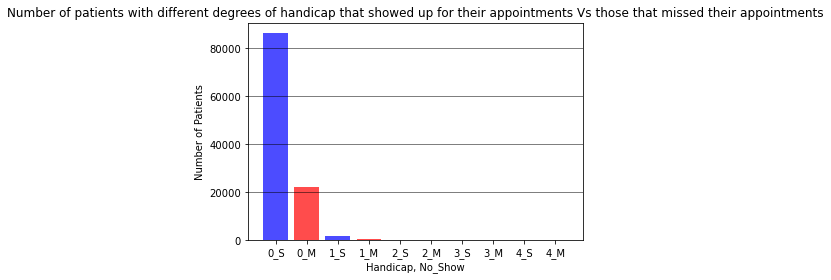

In [76]:
# Here, I'm showing number of patients with different degrees of disability that showed up for their appointments Vs those that missed their appointments 


deg0_showedUp = ns10[0]
deg0_Missed = ns10[1]
deg1_showedUp = ns10[2]
deg1_Missed = ns10[3]
deg2_showedUp = ns10[4]
deg2_Missed = ns10[5]
deg3_showedUp = ns10[6]
deg3_Missed = ns10[7]
deg4_showedUp = ns10[8]
deg4_Missed = ns10[9]

colors = ['blue','red','blue','red', 'blue','red','blue','red', 'blue','red']
locations = [1,2,3,4,5,6,7,8,9,10]
heights = [deg0_showedUp, deg0_Missed, deg1_showedUp, deg1_Missed, deg2_showedUp, deg2_Missed, deg3_showedUp, deg3_Missed, deg4_showedUp, deg4_Missed]
labels = ['0_S', '0_M','1_S', '1_M','2_S', '2_M','3_S', '3_M', '4_S', '4_M']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7,)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Number of patients with different degrees of handicap that showed up for their appointments Vs those that missed their appointments')
plt.ylabel('Number of Patients');
plt.xlabel('Handicap, No_Show');

##### Looking closely at the group of patients that showed up for their appointment below

In [77]:
df_showedUp['Handicap'].value_counts(normalize=True)

0    0.979208
1    0.019001
2    0.001655
3    0.000113
4    0.000023
Name: Handicap, dtype: float64

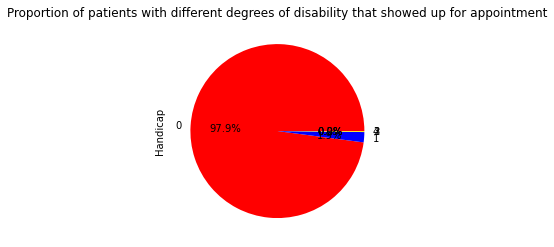

In [78]:
colors = ['red', 'blue','yellow','red','purple']
labels = ['0','1','2','3','4']
df_showedUp['Handicap'].value_counts().plot.pie(colors=colors, labels=labels, autopct='%.1f%%')
plt.title('Proportion of patients with different degrees of disability that showed up for appointment');

##### Looking closely at the group that missed their appointment below

In [79]:
df_Missed['Handicap'].value_counts(normalize=True)

0    0.981764
1    0.016399
2    0.001658
3    0.000134
4    0.000045
Name: Handicap, dtype: float64

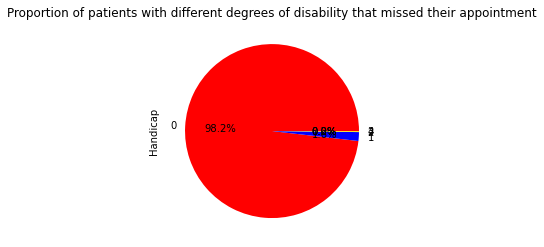

In [80]:
colors = ['red', 'blue','yellow','red','purple']
labels = ['0','1','2','3','4']
df_Missed['Handicap'].value_counts().plot.pie(colors=colors, labels=labels, autopct='%.1f%%')
plt.title('Proportion of patients with different degrees of disability that missed their appointment');

#### Insight I can draw from the visualizations:
>(1) Most of the patients (approx. 98%) are not handicapped.\
 (2)Looking closely at the group of patients that showed up and the group that missed appointments, being handicapped doesn't seem to have any relationship with showing up for or missing appointments.

## Question 5: Does receiving an SMS play any role in patient's showing up or missing appointment? 

In [81]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [82]:
df['SMS_received'].value_counts(normalize=True)

0    0.678971
1    0.321029
Name: SMS_received, dtype: float64

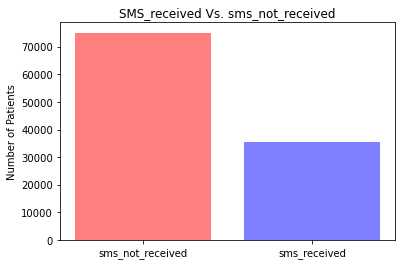

In [83]:
sms_not_received = sum(df['SMS_received'] == 0)
sms_received = sum(df['SMS_received'] == 1)
colors = ['red', 'blue']
locations = [1,2]
SMS_heights = [sms_not_received, sms_received]
labels = ['sms_not_received', 'sms_received']
plt.bar(locations, SMS_heights, color=colors, tick_label=labels, alpha=0.5)
plt.title('SMS_received Vs. sms_not_received')
plt.ylabel('Number of Patients');

In [84]:
# categorising the number of patients that showed up Vs patients that missed appointments by gender
sms_df =df['No_show'].groupby(df['SMS_received']).value_counts(normalize=True).tolist()
sms_df

[0.8329646607323703, 0.16703533926762965, 0.7242545516036301, 0.27574544839637]

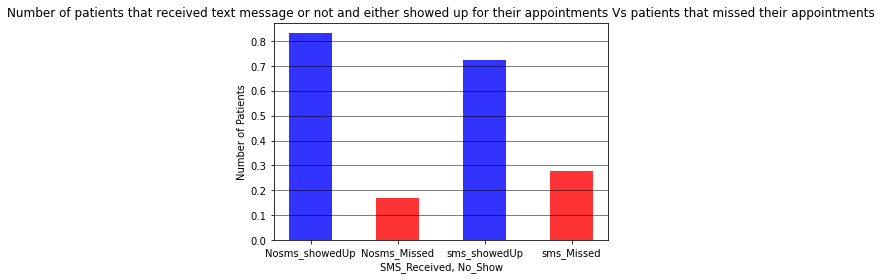

In [85]:
# Here, I want to visualize proportion of people that received sms or not and either showed up for appointments Vs patients that missed their appointment, 

Nosms_showedUp = sms_df[0]
Nosms_Missed = sms_df[1]
sms_showedUp = sms_df[2]
sms_Missed = sms_df[3]
colors = ['blue','red','blue','red']
locations = [1,2,3,4]
heights = [Nosms_showedUp, Nosms_Missed, sms_showedUp, sms_Missed]
labels = ['Nosms_showedUp', 'Nosms_Missed', 'sms_showedUp', 'sms_Missed']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.8, width=0.5)
plt.grid(color='black', linewidth=1, axis='y', alpha=0.5)
plt.title('Number of patients that received text message or not and either showed up for their appointments Vs patients that missed their appointments')
plt.ylabel('Number of Patients');
plt.xlabel('SMS_Received, No_Show');

### Insights from visualizations:
> (1) About 32% of the total sample of patients received a text message about their appointment.\
  (2) Surprisingly, more patients from the group that received SMS reminders missed their appointments.

<a id='conclusions'></a>
## Final Conclusions and Limitations

> Insights obtained from the data analysis to answer each of the questions have been discussed under each question section.\
  However, the findings of the analysis of this dataset are still summarised below:\
  Majority of the patients showed up for their appointments while a smaller proportion missed their appointments.\
  Some finer details are:\
  (1)The histogram for age didtribution of patients that missed their appointments shows that younger people missed their appointment more than the older patients.\
  (2) The data analysis suggests that showing up or missing appointments has got nothing to do with a patient's gender.\
  (3) A slightly higher proportion of the scholarship recipient group missed their appointments compared to the group of patients without scholarship.\
  (4)A larger percentage of hypertensive patients kept their appointments. Similary, there was a higher proportion of diabetic patients that showed up for their appointments than diabetic patients who missed their appointments. Alcoholism doesn't seem to have a relationship with showing up or missing appointment. Being handicapped doesn't seem to have any relationship with showing up for or missing appointments.\
  (5)Surprisingly, more patients from the group that received SMS reminders missed their appointments.\
  
  #### Limitations
 > For, the conclusions drawn above,no hypothesis testing or statistical significance test was carried out.
     Also, no machine learning models were run on the dataset.